[0 0 0 ... 0 0 0]


'\n    for j, name in enumerate(sheet_names2):\n        sheet_df2[j] = file2.parse(name)\n        end_number = (np.where(sheet_df2[j][\'INFORMATION\']=="CHANNEL")[0][1])\n        sig2 = (sheet_df2[j][\'Unnamed: 3\'][24:end_number-5])\n        sig2 = sig2 - sig2.mean()\n        corr = np.correlate(sig1, sig2, "full")\n        estimated_delay = corr.argmax() - (len(sig1) - 1)\n        print("estimated delay is " + str(estimated_delay)+ "_" + str(i) +"_"+ str(j))\n\n        plt.figure(figsize=(6, 4), dpi=50)\n        plt.subplots_adjust(wspace=0.4, hspace=0.6)\n        plt.subplot(4, 1, 1)\n        plt.ylabel("sig"+str(i))\n        plt.plot(sig1)\n        plt.subplot(4, 1, 2)\n        plt.ylabel("sig"+str(j))\n        plt.plot(sig2, color="g")\n\n        plt.subplot(4, 1, 3)\n        plt.ylabel("fit")\n        plt.plot(np.arange(len(sig1)), sig1)\n        plt.plot(np.arange(len(sig2)) + estimated_delay, sig2 )\n        plt.xlim([0, len(sig1)])\n\n        plt.subplot(4, 1, 4)\n        plt.

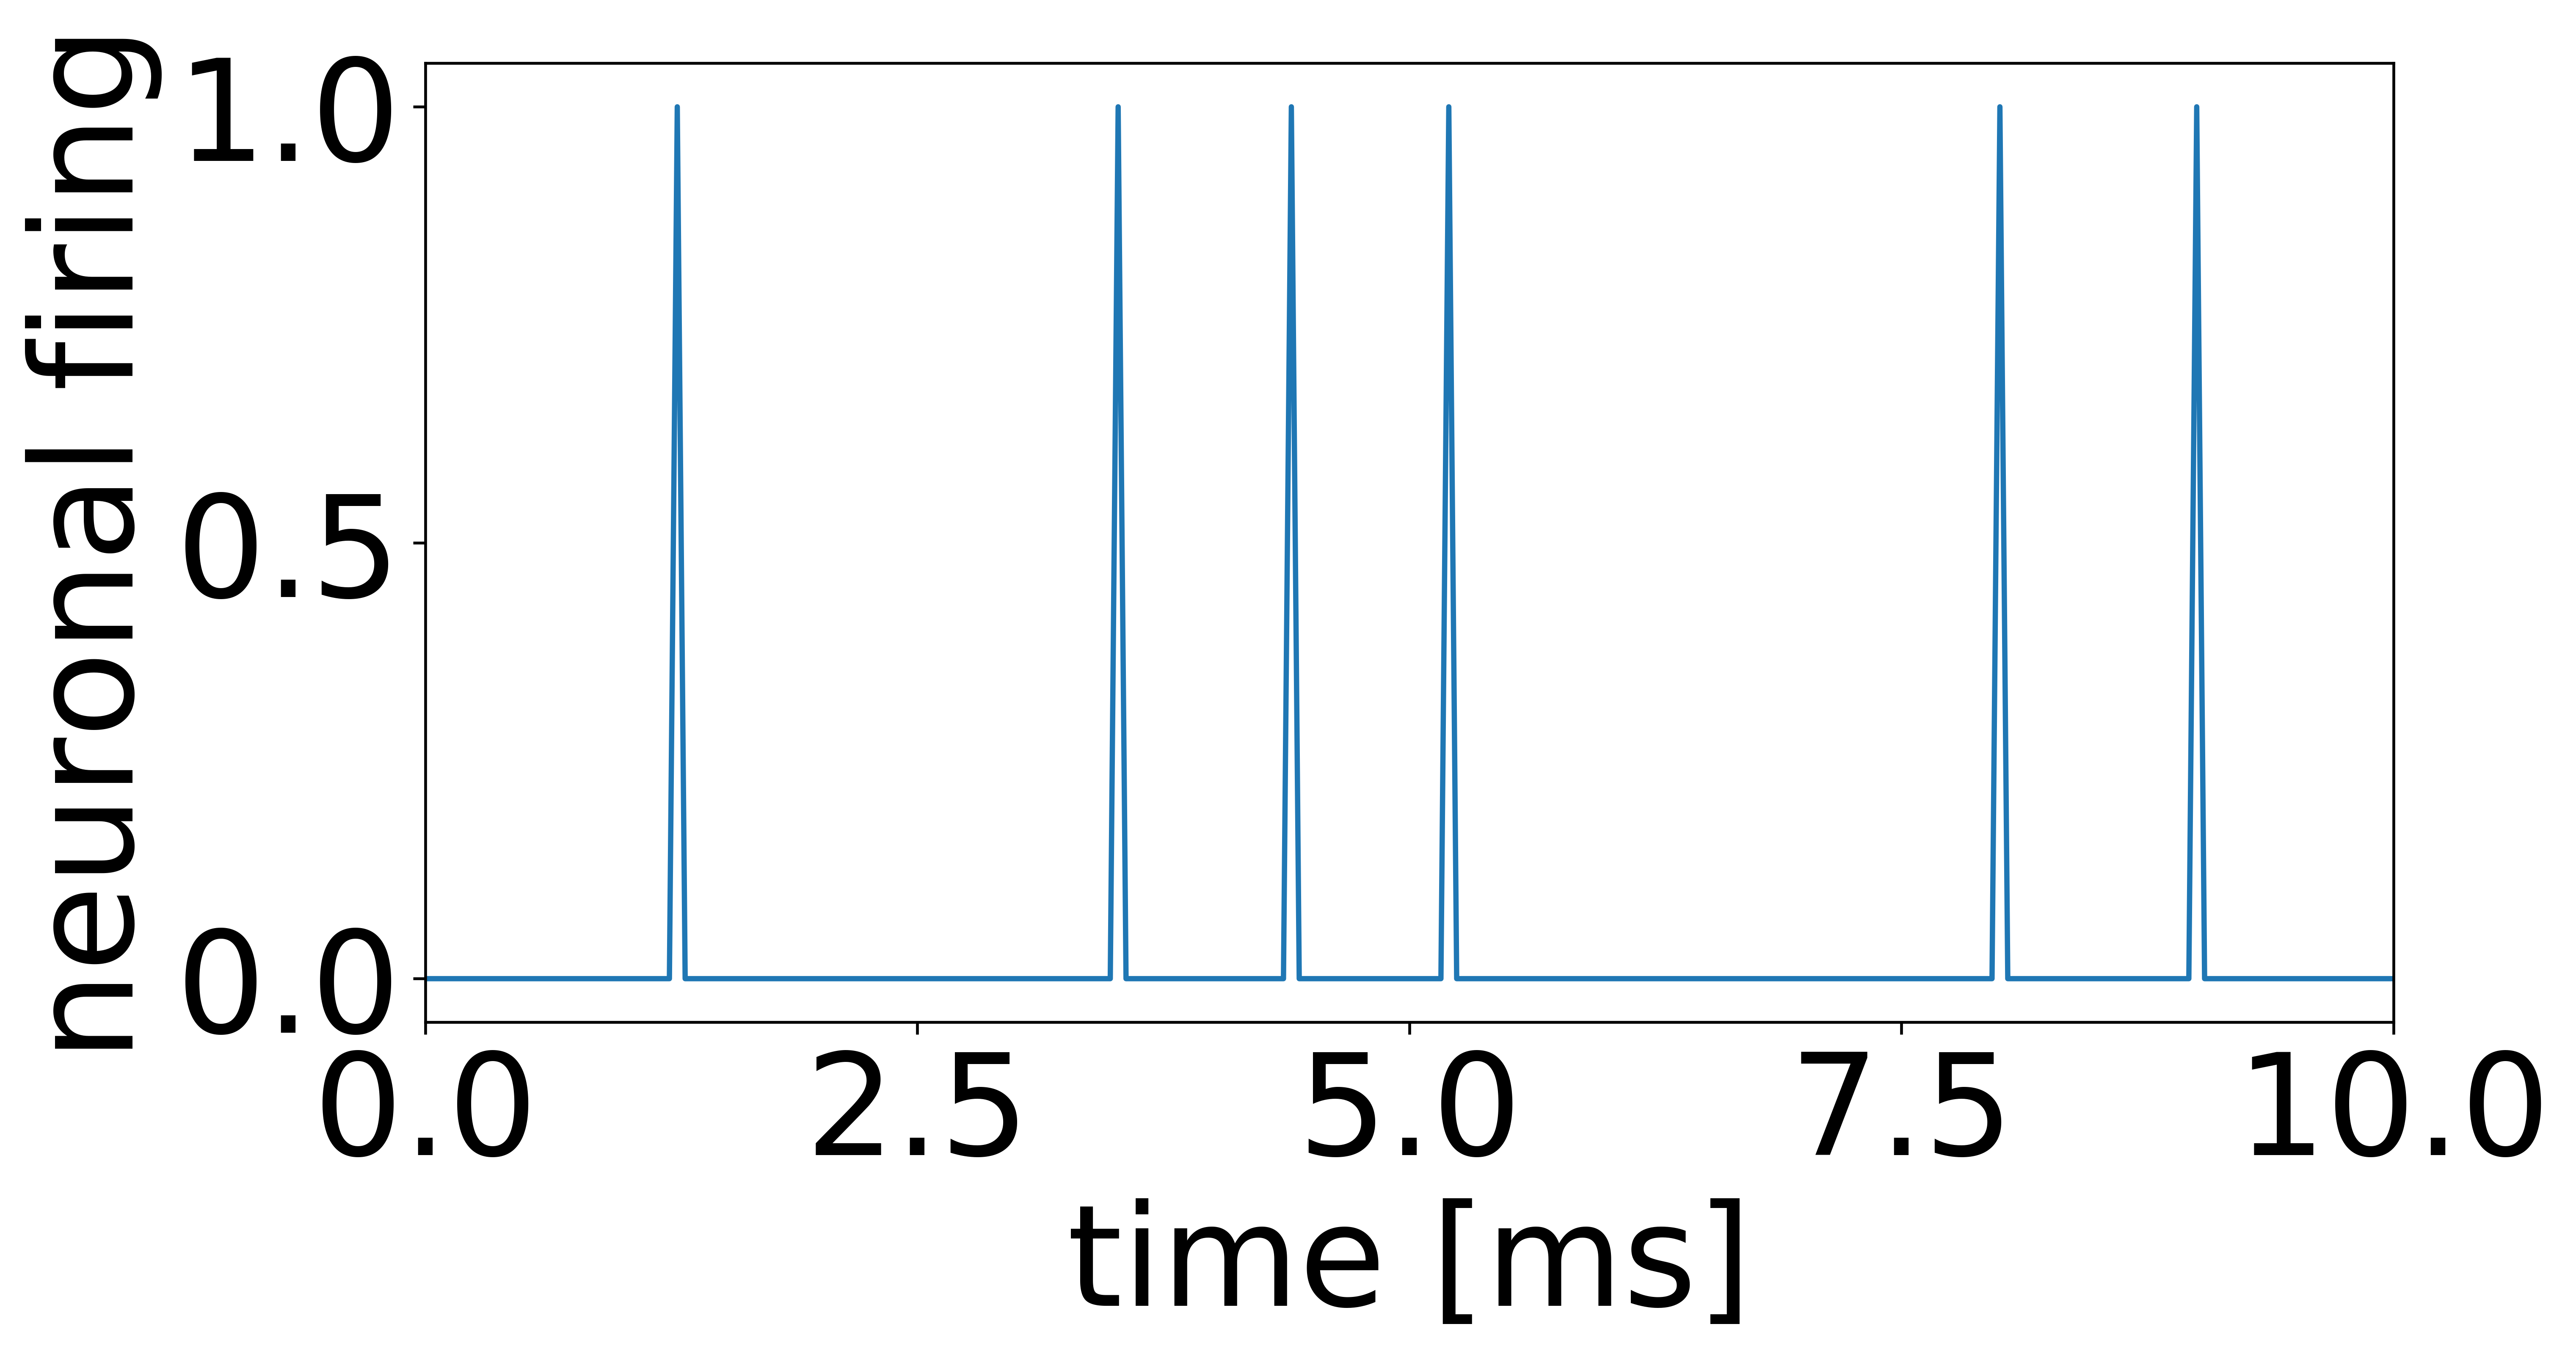

In [3]:
#エクセルファイルの変換を目指して
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
file_name1 = 'B39 restraint R3'
file_name2 = 'B39 restraint R3'
file1 = pd.ExcelFile(file_name1+'.xls')
file2 = pd.ExcelFile(file_name2+'.xls')
time_file = open(file_name1 + '_' + file_name2 +'_time_data.csv', 'w')

time_leng = 1

sheet_df1 = file1.parse(file1.sheet_names, header=None)
sheet_df2 = file2.parse(file2.sheet_names, header=None)

#cmap = plt.get_cmap("tab20")

sheet_names1 = file1.sheet_names
sheet_names2 = file2.sheet_names

for i, name in enumerate(sheet_names1):
    sheet_df1[i] = file1.parse(name)
    end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
    #print(sheet_df1[i])
    sig1 = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
    #sig1 = sig1 - sig1.mean()
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig1[k : k+time_leng].sum()
    x = np.linspace(0, leng-1, leng)
    #plt.plot(sig1)
    #plt.show()
    #print(sig1)
    #print(psth)

fig = plt.figure(figsize=(10, 5), dpi=600)
plt.rcParams["font.size"] = 40
plt.plot(x/25, psth)#,  color=cmap(i))
plt.xlabel("time [ms]")
plt.ylabel("neuronal firing")
plt.xlim(0, 10)
#plt.tick_params(fontsize = 40)
#plt.rcParams["font.size"] = 40
#plt.tight_layout()
plt.savefig("./info_graph/firing", bbox_inches='tight')
print(psth)
#plt.show()
"""
    for j, name in enumerate(sheet_names2):
        sheet_df2[j] = file2.parse(name)
        end_number = (np.where(sheet_df2[j]['INFORMATION']=="CHANNEL")[0][1])
        sig2 = (sheet_df2[j]['Unnamed: 3'][24:end_number-5])
        sig2 = sig2 - sig2.mean()
        corr = np.correlate(sig1, sig2, "full")
        estimated_delay = corr.argmax() - (len(sig1) - 1)
        print("estimated delay is " + str(estimated_delay)+ "_" + str(i) +"_"+ str(j))

        plt.figure(figsize=(6, 4), dpi=50)
        plt.subplots_adjust(wspace=0.4, hspace=0.6)
        plt.subplot(4, 1, 1)
        plt.ylabel("sig"+str(i))
        plt.plot(sig1)
        plt.subplot(4, 1, 2)
        plt.ylabel("sig"+str(j))
        plt.plot(sig2, color="g")

        plt.subplot(4, 1, 3)
        plt.ylabel("fit")
        plt.plot(np.arange(len(sig1)), sig1)
        plt.plot(np.arange(len(sig2)) + estimated_delay, sig2 )
        plt.xlim([0, len(sig1)])

        plt.subplot(4, 1, 4)
        plt.ylabel("corr")
        plt.plot(np.arange(len(corr)) - len(sig2) + 1, corr, color="r")
        plt.xlim([0, len(sig1)])
        plt.show()
        print(i,j)
        #plt.savefig("./image2/"+ str(i) +"_"+ str(j) +".png")
        

file1.close()
file2.close()
#time_file.close()
"""

|   |   |
